#Section 1.3: Deterministic Finite Automata (DFAs)

##Learning Objectives

After completing this chapter, you will be able to:

* Define a deterministic finite automaton (DFA).
* Represent a DFA with a state diagram or a transition table.
* Work with and understand a DFA class built in Python.
* Define a language with a DFA.

## 1.3.1 Basic Concepts and Definitions

Let's talk about games.

In the United States two popular games for children are Candyland and Chutes and Ladders. You may have played them when you were a kid. The basic idea for both is very simple - you move along a sequence of squares by either drawing cards or rolling dice, and the goal is to get to the end of the sequence. It's a race, but there's no strategy involved - whether you win or lose is entirely up to the luck of either the draw or the roll. It's good for children, and it teaches them to follow directions and pay attention, but whether you win the game is based on chance and it's not possible to get "good" at playing the game.

<center>
  <img src="https://drive.google.com/uc?export=view&id=1kMNyzLVOnLLX_tnz5md6-pex-mDOueW_" height = "500" alt="Candyland">
  <br>
  <img src="https://drive.google.com/uc?export=view&id=1yVK7hhT8NUARwvZtAA8MxS_wODHR1Eu4" height = "600" alt="Chutes and Ladders">
</center>

What are some characteristics of these games? Well, they both involve:
* A finite set of states, one of which is designated as the initial state, called the *start state*, and some of which are designated winning or *accepting states*.
* A set of possible inputs. In these games, either the draw of a card or the roll of a dice.
* A finite set of *transitions* that tell you for each state and for each input which state to go to next.

This is, essentially, the definition of a *deterministic finite automaton* (DFA for short). It's *deterministic* because for any given state and input there's one and only one transition, it's *finite* because the number of possible states and possible inputs is finite, and it's an *automaton* because the change of states is totally governed by the input. In other words, it's automatic - there is no choice involved. ("Automaton" comes from Greek, and its correct plural is "automata"). The formal definition is below.

---

**Definition**

A **deterministic finite automaton** (DFA) consists of:
* A finite set of states $\displaystyle Q$.
* A finite set $\displaystyle \Sigma$ of input characters, called its *alphabet*.
* A transition function $T$, where for every state $q \in Q$ and input character $a \in \Sigma$ there is a transition map $T(q,a) \rightarrow q'$ specifying the next state after the automaton in state $q$ reads the input $a$.
* A unique initial state $q_{0}$
* A subset $F \subseteq Q$ of accepting states. Note the set of accepting states could possibly be empty, possibly have more than one element, and possibly contain the initial state.

This $5$-tuple, $(Q,\Sigma,T,q_{0},F)$ defines a finite automaton.

---

## 1.3.2 Representing DFAs

Let's suppose we have a much simpler game than either Candyland or Chutes and Ladders. Instead of rolling a dice we just flip a coin, so the possibilities at any state are just heads and tails. In other words, our input alphabet is just $\Sigma = \{H,T\}$. Our board looks like this:

<center>
  <img src="https://drive.google.com/uc?export=view&id=1BYLUIXexFtMEWQFAvlBSB8-BQOeAotxD" height = "500" alt="Simple Chutes and Ladders">
</center>

The idea here is that:
* The game starts at the initial state $1$.
* On the first flip of the coin, the player advances to state $2$ for anything they flip.
* At state $2$, if the player flips $T$ they take a ladder to the accepting state $4$. If the player flips $H$, they advance to state $3$.
* At state $3$, if the player flips $H$ they take a chute back to the initial state $1$. For $T$, they advance to the accepting state $4$.
* If, for some reason, the player wants to keep playing at the accepting state, they just stay there for any coin flip.

In the board diagram, the circles (or *nodes*) are the different states, and the arrows (or edges) marked with letters represent how those input letters transition between states. The initial state is marked with $-$, and the accepting states are makred with $+$. This is the basic idea behind the *state diagram* of a DFA, which is a compact and illuminating way of representing all its features.

We could also represent the board using a *transition table*. Specifically, the rows of the table correspond with the states of the DFA, the columns correspond with the possible inputs (the alphabet), and the entries represent the transitions:

<center>

| State | H | T |
| :---: | :---: | :---: |
| 1- | 2 | 2 |
| 2 | 3 | 4 |
| 3 | 1 | 4 |
| 4+ | 4 | 4 |

</center>

## 1.3.3 Representing DFAs in Python

We can diagram a DFA in Python using the *Digraph* class from the graphviz library. The *Source* class lets us visualize it. Be sure to run the inport code below before running any of the code later in the notebook.

In [2]:
from graphviz import Digraph, Source

We can create a class (we'll call it *cal* for "Chutes and Ladders"), and then specify the states and the transitions (called nodes and edges in the *Digraph* class).

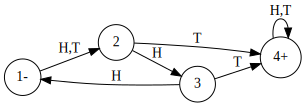

In [3]:
cal = Digraph()
cal.attr(rankdir='LR') # This specifies the diagram should go left to right

# States
cal.node('1-', shape='circle') # Initial state
cal.node('2', shape='circle')
cal.node('3', shape='circle')
cal.node('4+', shape='circle') # Accept state

# Transitions
cal.edge('1-', '2', label='H,T')
cal.edge('2', '3', label='H')
cal.edge('2', '4+', label='T')
cal.edge('3', '1-', label='H')
cal.edge('3', '4+', label='T')
cal.edge('4+', '4+', label='H,T')

#Display the diagram
Source(cal.source)

Another way you'll frequently see DFA state diagrams is with the initial state represented by an incoming arrow that doesn't start on any node, and the accepting states represented by double circle nodes. Using these conventions, the state diagram above would look like:

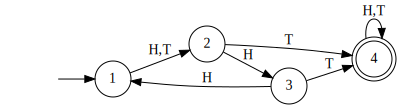

In [4]:
cal2 = Digraph()
cal2.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
cal2.node('', shape='none')
cal2.edge('', '1')

# States
cal2.node('1', shape='circle') # Initial state
cal2.node('2', shape='circle')
cal2.node('3', shape='circle')
cal2.node('4', shape='doublecircle') # Accept state

# Transitions
cal2.edge('1', '2', label='H,T')
cal2.edge('2', '3', label='H')
cal2.edge('2', '4', label='T')
cal2.edge('3', '1', label='H')
cal2.edge('3', '4', label='T')
cal2.edge('4', '4', label='H,T')

#Display
Source(cal2.source)

Now, let's create a DFA Python class. In order to define a finite automaton, we need to provide the tuple described in the definition from Section 1.3.1.

In [5]:
class DFA:
    def __init__(self, states, alphabet, transition_function, start_state, accept_states):
        self.states = set(states)
        self.alphabet = set(alphabet)
        self.transition_function = transition_function
        self.start_state = start_state
        self.accept_states = set(accept_states)

        self.validate()

This initializes a DFA class, with a set of states, an alphabet (set of characters), transition functions, a start state, and a set of accept states. It also runs a *validate* method to make sure it's a proper tuple and the definition makes sense. This validate method is provided below:

In [6]:
def validate(self):
  if self.start_state not in self.states:
    raise ValueError("Start state must be in states.")
  if not self.accept_states.issubset(self.states):
    raise ValueError("Accept states must be a subset of states.")

  # Ensure total transition function
  for state in self.states:
    for symbol in self.alphabet:
      if (state, symbol) not in self.transition_function:
        raise ValueError(f"Missing transition for state '{state}' on symbol '{symbol}'.")

  # Ensure all transitions are to valid states and symbols
  for (state, symbol), next_state in self.transition_function.items():
    if state not in self.states or next_state not in self.states:
      raise ValueError(f"Invalid transition: ({state}, {symbol}) → {next_state}")
    if symbol not in self.alphabet:
      raise ValueError(f"Symbol '{symbol}' not in alphabet.")

#Make this function a method for the DFA class.
DFA.validate = validate

This method makes sure that:

* The specified start states is in the set of states.
* The specified accept states are a subset of the set of states.
* There is a transition for every state and character in the alphabet.
* All transitions are to and from states within the set of states.

We can test this by creating the simplified Chutes and Ladders DFA from Section 1.3.2 above:

In [7]:
cal = DFA(
    states={'1', '2', '3', '4'},
    alphabet={'H', 'T'},
    transition_function={
        ('1', 'H'): '2',
        ('1', 'T'): '2',
        ('2', 'H'): '3',
        ('2', 'T'): '4',
        ('3', 'H'): '1',
        ('3', 'T'): '4',
        ('4', 'H'): '4',
        ('4', 'T'): '4'
    },
    start_state='1',
    accept_states={'4'}
)

If we were to change this by specifying the start state to be "42", the validate method will raise an error, as "42" is not in the set of states.

In [8]:
adams = DFA(
    states={'1', '2', '3', '4'},
    alphabet={'H', 'T'},
    transition_function={
        ('1', 'H'): '2',
        ('1', 'T'): '2',
        ('2', 'H'): '3',
        ('2', 'T'): '4',
        ('3', 'H'): '1',
        ('3', 'T'): '4',
        ('4', 'H'): '4',
        ('4', 'T'): '4'
    },
    start_state='42',
    accept_states={'4'}
)

ValueError: Start state must be in states.

Let's also create a method that builds and returns the Digraph for the state diagram of the DFA. We'll use the second convention above, with the initial state represented with an incoming arrow without a source node, and the finial states represented by double circles.

In [9]:
def build_graph(self):
  dot = Digraph()
  dot.attr(rankdir='LR')
  dot.node('', shape='none')
  dot.edge('', self.start_state)

  for state in self.states:
    shape = 'doublecircle' if state in self.accept_states else 'circle'
    dot.node(state, shape=shape)

  for (src, symbol), dst in self.transition_function.items():
    dot.edge(src, dst, label=symbol)

  return dot

DFA.build_graph = build_graph

We'll also add a method for building and then displaying the state diagram.

In [10]:
def show(self):
  dot = self.build_graph()
  display(Source(dot.source))

DFA.show = show

Let's use these methods to display the state diagram for the Chutes and Ladders DFA.

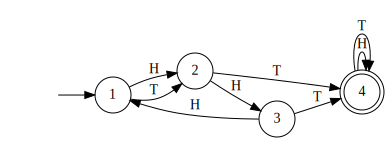

In [11]:
cal.show()

Note we don't have a single arrow from *1* to *2* with $H,T$ above it, and have instead explicitly separated the $H$ and $T$ transitions. This will be the convention for diagrams created from our DFA class.

## 1.3.4 DFAs and Languages

For the simple game in Section 1.3.2 we could ask, for a given sequence of flips, whether the player wins the game - meaning whether at the end of the sequence the player is on an accepting state. For the sequence $HHHT$ the answer would be *no*. For the sequence $THT$, the answer would be *yes*. We can view the set of winning sequences of flips as a *language*, and we say the game - or DFA - above *accepts* this language.

For any finite automaton with input alphabet $\Sigma$, we can view a sequence of characters from $\Sigma$ as corresponding with a sequence of transitions in the DFA. The DFA begins at its start state, reads the first character in the string, transitions to one of its states according to the character and its transition function, and then repeats. This process continues until the DFA has read every character in the string. If at this point the DFA is in an accepting state, the string is accepted. If not, the string is rejected. We say a string that is accepted by a DFA is *recognized* by that DFA.

---

**Definition**

For a deterministic finite automaton (DFA) with an input alphabet $\Sigma$, the set of strings over $\Sigma$ that are recognized by that DFA is the language defined by that DFA.

---

**Example 1** - Build a DFA with input alphabet $\Sigma = \{0,1\}$ that accepts any bitstring (a string of $0$s and $1$s) that ends in a $1$.

**Example 1 Solution** - The DFA defined below accepts the specified language.

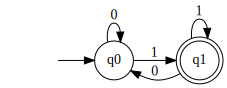

In [13]:
lastone = DFA(
    states={'q0', 'q1'},
    alphabet={'0', '1'},
    transition_function={
        ('q0', '0'): 'q0',
        ('q0', '1'): 'q1',
        ('q1', '0'): 'q0',
        ('q1', '1'): 'q1',
    },
    start_state='q0',
    accept_states={'q1'}
)

lastone.show()

**Example 2**: Build a DFA that accepts only those words that begin or end with a double letter.

**Example 2 Solution** -

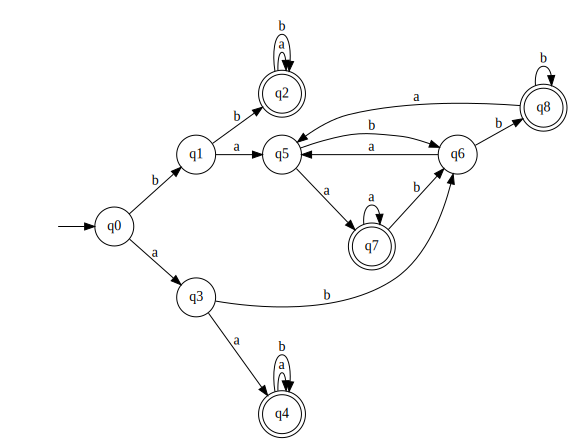

In [14]:
doubleletter = DFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8'},
    alphabet={'a', 'b'},
    transition_function={
        ('q0', 'a'): 'q3',
        ('q0', 'b'): 'q1',
        ('q1', 'a'): 'q5',
        ('q1', 'b'): 'q2',
        ('q2', 'a'): 'q2',
        ('q2', 'b'): 'q2',
        ('q3', 'a'): 'q4',
        ('q3', 'b'): 'q6',
        ('q4', 'a'): 'q4',
        ('q4', 'b'): 'q4',
        ('q5', 'a'): 'q7',
        ('q5', 'b'): 'q6',
        ('q6', 'a'): 'q5',
        ('q6', 'b'): 'q8',
        ('q7', 'a'): 'q7',
        ('q7', 'b'): 'q6',
        ('q8', 'a'): 'q5',
        ('q8', 'b'): 'q8',
    },
    start_state='q0',
    accept_states={'q2', 'q4', 'q7', 'q8'}
)

doubleletter.show()

## 1.3.5 Using DFAs In Python

In Section 1.3.3 we created a class and some methods for implementing DFAs in Python and for visualizing their state diagrams. We may now want to know for a given DFA whether it accepts a given string over its input alphabet. Let's build a method for answering this question, by first building a method for tracing through the states encountered by the DFA as it processes an input string.

In [15]:
# Method for tracing through the sequence of states of the finite automaton as it processes an input string.
def trace(self, input_string):
  trace = [self.start_state]
  current_state = self.start_state
  for symbol in input_string:
    if (current_state, symbol) not in self.transition_function:
      trace.append(None)
      break
    current_state = self.transition_function[(current_state, symbol)]
    trace.append(current_state)
  return trace

DFA.trace = trace

In [17]:
# Method for determining whether an input string is accepted by the finite automaton.
def accepts(self, input_string):
  trace = self.trace(input_string)
  return trace[-1] in self.accept_states

DFA.accepts = accepts

We can try these methods out on the finite *doubleletter* finite automaton we created above.

In [18]:
doubleletter.accepts('abbabaab')

False

In [19]:
doubleletter.accepts('abbabaabb')

True

In [20]:
doubleletter.accepts('aabbabaab')

True

The first string neither begins nor ends with a double letter, and so is not accepted. The second string ends with a double letter, and so is accepted. The third string begins with a double letter, and so is accepted.

If we wanted to trace out the sequence of states of the *doubleletter* finite automaton as it reads the string "abbabaab" we can use the *trace* method.

In [21]:
doubleletter.trace('abbabaab')

['q0', 'q3', 'q6', 'q8', 'q5', 'q6', 'q5', 'q7', 'q6']

**Example 3** - What is the sequence of states visited by the *doubleletter* finite automaton for the input string "abbabbaab"?

**Example 3 Solution** -

In [22]:
doubleletter.trace('abbabbaab')

['q0', 'q3', 'q6', 'q8', 'q5', 'q6', 'q8', 'q5', 'q7', 'q6']

It's last state, 'q6', is not an accepting state, and so the string would not be accepted.



In [23]:
doubleletter.accepts('abbabbaab')

False

**NOTE** - The way we've designed the DFA class, by first specifying the class and its constructor, and then adding methods in later cells, is not best practice. We'd usually want to build all the methods we need into the initial class definition. We chose to introduce the methods one at a time for teaching purposes, but an implementation of the DFA class with all the methods included in its initial definition can be found in the appendix at the end of this chapter (Section 1.3.8).

## 1.3.6 Practice Exercises

**NOTE** - For the following exercises the input alphabet is always $\Sigma = \{a,b\}$. For each of these you should create the state diagram and / or transition table on your own, then create the corresponding DFA object in Python, then verify the given word is accepted by the DFA.

**Exercise 1**: Create a state diagram *and* a transition table for a DFA that accepts only the words $baa$, $ab$, and $abb$ and no other words.

*Word* - "abb".

**Exercise 2**: Create a state diagram for a DFA that accepts only those words that have more than four letters.

*Word* - "abbaba".

**Exercise 3:** Create a state diagram for a DFA that accepts only those words that have fewer than four letters.

*Word* - "bab".

**Exercise 4:** Create a state diagram for a DFA that accepts only those words with *exactly* four letters.

*Word* - "abba".

## 1.3.7 Further Reading

* "Introduction to Computer Theory" by Daniel I.A. Cohen *Chapter 5 - Finite Automata*
* "Introduction to the Theory of Computation" by Michael Sipser *Section 1.1 - Finite Automata*
* "Automata Theory, Languages, and Computation" by Hopcroft, Motwani, and Ullman *Chapter 2 - Finite Automata*
* More on [graphviz](https://graphviz.org/)

## 1.3.8 Appendix: The DFA Class with All Methods

To use and run, remove the comments.

In [ ]:
'''
class DFA:
    def __init__(self, states, alphabet, transition_function, start_state, accept_states):
        self.states = set(states)
        self.alphabet = set(alphabet)
        self.transition_function = transition_function
        self.start_state = start_state
        self.accept_states = set(accept_states)

        self._validate()

    def _validate(self):
        if self.start_state not in self.states:
            raise ValueError("Start state must be in states.")
        if not self.accept_states.issubset(self.states):
            raise ValueError("Accept states must be a subset of states.")

        # Ensure total transition function
        for state in self.states:
            for symbol in self.alphabet:
                if (state, symbol) not in self.transition_function:
                    raise ValueError(f"Missing transition for state '{state}' on symbol '{symbol}'.")

        # Ensure all transitions are to valid states and symbols
        for (state, symbol), next_state in self.transition_function.items():
            if state not in self.states or next_state not in self.states:
                raise ValueError(f"Invalid transition: ({state}, {symbol}) → {next_state}")
            if symbol not in self.alphabet:
                raise ValueError(f"Symbol '{symbol}' not in alphabet.")

    def trace(self, input_string):
        trace = [self.start_state]
        current_state = self.start_state
        for symbol in input_string:
            if (current_state, symbol) not in self.transition_function:
                trace.append(None)
                break
            current_state = self.transition_function[(current_state, symbol)]
            trace.append(current_state)
        return trace

    def accepts(self, input_string):
        trace = self.trace(input_string)
        return trace[-1] in self.accept_states

    def show(self):
        """Display DFA inline in a Jupyter notebook."""
        dot = self._build_graph()
        display(Source(dot.source))

    def _build_graph(self):
        dot = Digraph()
        dot.attr(rankdir='LR')
        dot.node('', shape='none')
        dot.edge('', self.start_state)

        for state in self.states:
            shape = 'doublecircle' if state in self.accept_states else 'circle'
            dot.node(state, shape=shape)

        for (src, symbol), dst in self.transition_function.items():
            dot.edge(src, dst, label=symbol)

        return dot
''';